#  Customer Behavior Project - EDA & Data Cleaning

**Dataset:** Online Retail [1] 
**Objective:** Perform initial exploration and data cleaning to prepare for RFM analysis, clustering, and classification.

- Author: Tarık Buğra Ay
- Date: May, 2025

[1] D. Chen. "Online Retail," UCI Machine Learning Repository, 2015. [Online]. Available: https://doi.org/10.24432/C5BW33.


# Dataset Meta-data: Online Retail

**Source:** UCI Machine Learning Repository  
**Dataset Title:** Online Retail  
**Link:** https://archive.ics.uci.edu/dataset/352/online+retail
**DOI:**  10.24432/C5BW33
**Time Period Covered:** 1 December 2010 – 9 December 2011  
**Number of Rows:** 541,909  
**Number of Columns:** 8

**Description:**  
This dataset contains transactional data for a UK-based and registered non-store online retailer. The company mainly sells unique all-occasion gifts. The data includes transactions made by both retail and wholesale customers.

## Variables:

| Column Name  | Type          | Description                                                                                          |
|--------------|---------------|------------------------------------------------------------------------------------------------------|
| InvoiceNo    | Categorical   | 6-digit unique invoice number. If it starts with 'C', it indicates a cancelled transaction.         |
| StockCode    | Categorical   | Product/item code.                                                                                   |
| Description  | Categorical   | Name/description of the product.                                                                     |
| Quantity     | Integer       | Number of items purchased per transaction.                                                           |
| InvoiceDate  | DateTime      | Date and time of the transaction.                                                                    |
| UnitPrice    | Float         | Price per unit of the product (in British Pounds Sterling).                                          |
| CustomerID   | Categorical   | 5-digit unique identifier for each customer.                                                         |
| Country      | Categorical   | Country where the customer resides.                                                                  |

**Notable Points:**
- Transactions with InvoiceNo starting with 'C' are **cancellations (returns).**
- The **CustomerID** column contains missing values for certain transactions.
- Some rows may have **negative or zero quantities**, typically associated with cancellations or errors.
- The dataset covers customers from multiple countries, although it is UK-based.


# Imports

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visuals
%matplotlib inline
sns.set_theme(style='whitegrid')

# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Check environment
import sys
print(f"Python version: {sys.version}")


Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]


## Step 1: Checking Data Structure and Basic Information

In this step, we load the dataset and examine its basic structure. Our goals are to:
- Confirm the dataset's shape (number of rows and columns).
- Preview the data to understand its format.
- Review data types for each column.
- Check for missing values to assess data completeness.

**Dataset path:** `data/Online Retail.xlsx`

In [3]:
# Import necessary libraries
import pandas as pd

# Define the data path
data_path = '../data/Online Retail.xlsx'  # Adjust if running from /notebooks/

# Load the dataset
df = pd.read_excel(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and non-null counts:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (541909, 8)

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Insights from Initial Data Exploration

- The dataset contains 541,909 rows and 8 columns.
- All columns are present and their data types align with expectations:
    - `InvoiceDate` is correctly parsed as datetime.
    - IDs (`InvoiceNo`, `StockCode`, `CustomerID`) are in object or float format.
- Significant missing data is present in:
    - `CustomerID`: 135,080 missing (~25% of records).
    - `Description`: 1,454 missing (~0.27% of records).
- Other columns have no missing values.
- The presence of missing `CustomerID` values suggests these transactions may represent guest checkouts or data gaps. We will consider whether to exclude these rows in customer-level analyses later.


## Step 1.2: Checking Uniqueness of Identifiers and Data Consistency

In this step, we examine:
- The number of unique invoices and customers to understand the dataset's scope.
- Whether there are transactions with zero or negative quantities or unit prices, which may indicate cancellations, returns, or data errors.


In [4]:
# Unique counts
num_unique_invoices = df['InvoiceNo'].nunique()
num_unique_customers = df['CustomerID'].nunique()

print(f"Unique InvoiceNo count: {num_unique_invoices}")
print(f"Unique CustomerID count (excluding nulls): {num_unique_customers}")

# Check for negative or zero Quantity
num_negative_qty = (df['Quantity'] <= 0).sum()
print(f"\nRows with Quantity <= 0: {num_negative_qty}")

# Check for negative or zero UnitPrice
num_zero_or_negative_price = (df['UnitPrice'] <= 0).sum()
print(f"Rows with UnitPrice <= 0: {num_zero_or_negative_price}")


Unique InvoiceNo count: 25900
Unique CustomerID count (excluding nulls): 4372

Rows with Quantity <= 0: 10624
Rows with UnitPrice <= 0: 2517


### Insights on Identifier Uniqueness and Data Consistency

- The dataset contains 25,900 unique invoices and 4,372 unique customers (excluding missing `CustomerID`).
- On average, each invoice includes multiple line items, confirming this is typical transactional data.
- 10,624 rows have a `Quantity` of zero or negative:
    - These likely include product returns, cancellations, or possible data entry errors.
- 2,517 rows have a `UnitPrice` of zero or negative:
    - This may indicate free promotional items or data errors.
- These findings suggest that data cleaning will require careful handling of cancellations, returns, and potential outliers before any customer-level analysis.


## Step 1.3: Analyzing Cancellations

In this step, we examine cancellations, which are identified by `InvoiceNo` values starting with the letter 'C'. We aim to:
- Count the total number of cancellation rows.
- Check if cancellations align with negative quantities.
- Verify if there are any inconsistencies, such as:
    - Negative quantities that are not labeled as cancellations.
    - Cancellations with positive quantities.


In [5]:
# Identify cancellations
df['IsCancelled'] = df['InvoiceNo'].astype(str).str.startswith('C')

# Count cancellations
num_cancellations = df['IsCancelled'].sum()
print(f"Total cancellation rows: {num_cancellations}")

# Cancellations with Quantity <= 0
cancelled_negative_qty = df[(df['IsCancelled']) & (df['Quantity'] <= 0)].shape[0]
print(f"Cancellations with Quantity <= 0: {cancelled_negative_qty}")

# Cancellations with Quantity > 0 (should be rare/unusual)
cancelled_positive_qty = df[(df['IsCancelled']) & (df['Quantity'] > 0)].shape[0]
print(f"Cancellations with Quantity > 0: {cancelled_positive_qty}")

# Negative Quantity rows that are NOT cancellations
negative_not_cancel = df[(~df['IsCancelled']) & (df['Quantity'] <= 0)].shape[0]
print(f"Negative Quantity rows not marked as cancellations: {negative_not_cancel}")


Total cancellation rows: 9288
Cancellations with Quantity <= 0: 9288
Cancellations with Quantity > 0: 0
Negative Quantity rows not marked as cancellations: 1336


### Insights on Cancellations and Negative Quantities

- There are 9,288 rows labeled as cancellations (identified by `InvoiceNo` starting with 'C').
- All 9,288 cancellations have a negative or zero quantity, which aligns with the dataset documentation.
- No cancellations have positive quantities, confirming consistent labeling.
- There are 1,336 rows that have a negative quantity but are **not marked as cancellations.**
    - These may represent data inconsistencies, special cases of returns, or errors that need further investigation.
- Overall, cancellations are cleanly identified, but we need to decide later whether to exclude the additional 1,336 negative-quantity rows from analysis or handle them separately.

## Step 1.4: Visualizing Distributions of Quantity and Unit Price

Here we explore the distribution of `Quantity` and `UnitPrice` to identify:
- Typical value ranges.
- Presence of extreme outliers.
- Overall distribution shape (normal, skewed, etc.).

We will also examine the distributions using a log scale where necessary to improve visibility of common values.


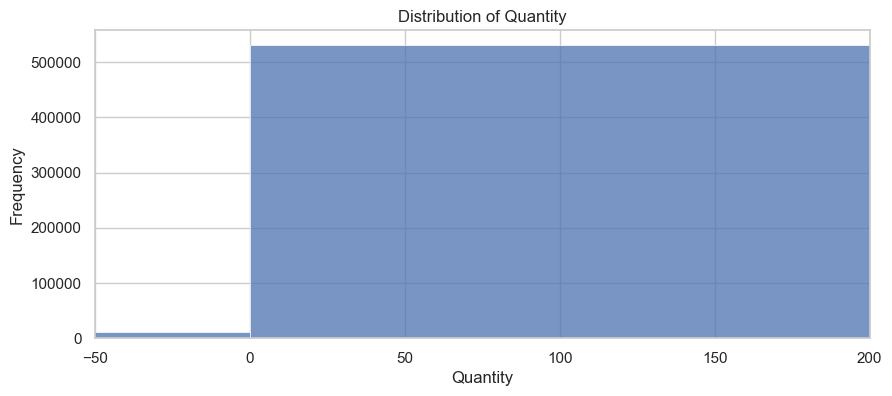

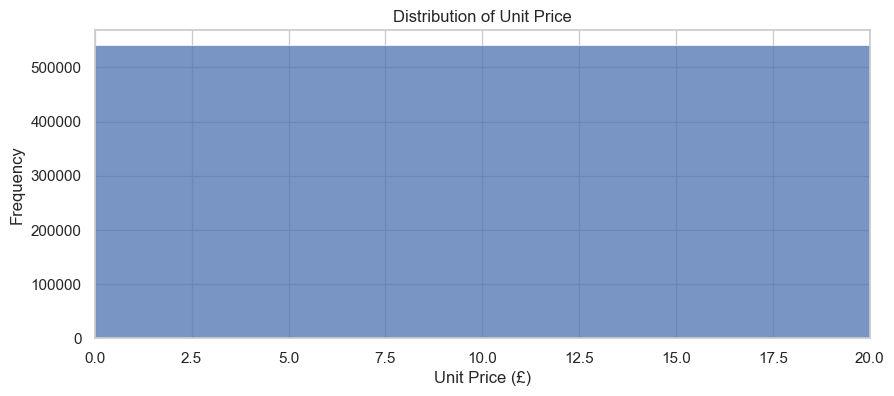

Quantity summary:
count   541909.00
mean         9.55
std        218.08
min     -80995.00
25%          1.00
50%          3.00
75%         10.00
max      80995.00
Name: Quantity, dtype: float64

UnitPrice summary:
count   541909.00
mean         4.61
std         96.76
min     -11062.06
25%          1.25
50%          2.08
75%          4.13
max      38970.00
Name: UnitPrice, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Quantity Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Quantity'], bins=100, kde=False)
plt.xlim(-50, 200)  # Focus on common values
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Unit Price Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['UnitPrice'], bins=100, kde=False)
plt.xlim(0, 20)  # Focus on common price range
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price (£)')
plt.ylabel('Frequency')
plt.show()

# Summary stats
print("Quantity summary:")
print(df['Quantity'].describe())
print("\nUnitPrice summary:")
print(df['UnitPrice'].describe())


## Step 1.5: Visualizing Distributions with Log Scale

The initial histograms showed that both `Quantity` and `UnitPrice` are heavily right-skewed. To improve visibility and better understand their distributions, we now plot them using a logarithmic x-axis. This allows us to capture both small and large values more effectively in the same plot.


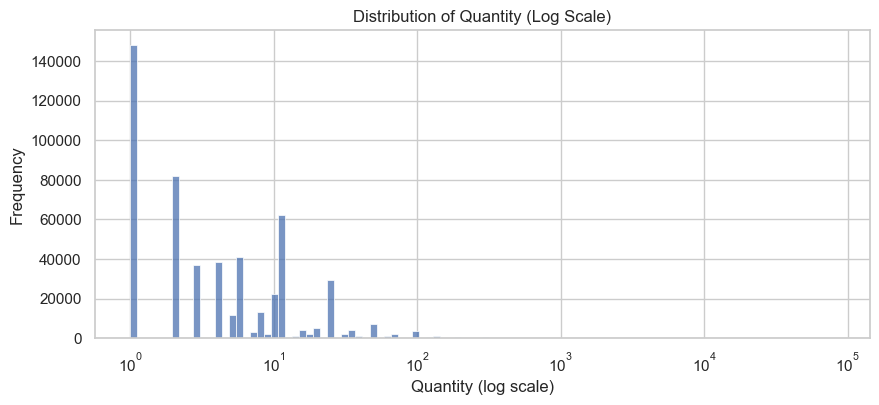

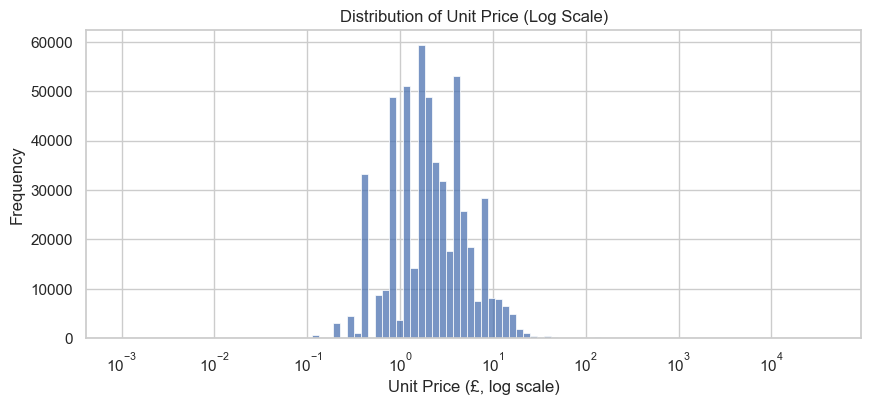

In [7]:
# Plot Quantity with log scale (exclude non-positive values to avoid log(0) issues)
plt.figure(figsize=(10, 4))
sns.histplot(df[df['Quantity'] > 0]['Quantity'], bins=100, log_scale=(True, False), kde=False)
plt.title('Distribution of Quantity (Log Scale)')
plt.xlabel('Quantity (log scale)')
plt.ylabel('Frequency')
plt.show()

# Plot Unit Price with log scale (exclude non-positive values)
plt.figure(figsize=(10, 4))
sns.histplot(df[df['UnitPrice'] > 0]['UnitPrice'], bins=100, log_scale=(True, False), kde=False)
plt.title('Distribution of Unit Price (Log Scale)')
plt.xlabel('Unit Price (£, log scale)')
plt.ylabel('Frequency')
plt.show()


### Insights from Distribution Analysis of Quantity and Unit Price

- Both `Quantity` and `UnitPrice` are highly right-skewed, as expected in transactional sales data.
- **Quantity:**
    - Most transactions involve a small number of items (median: 3 units).
    - There are significant outliers:
        - A minimum of -80,995 and a maximum of 80,995, indicating possible data errors or massive returns/orders.
- **Unit Price:**
    - The majority of unit prices fall between £1 and £10 (median: £2.08), aligning with expectations for gift items.
    - There are notable outliers:
        - A minimum of -£11,062 and a maximum of £38,970, which may indicate data entry errors or special cases (e.g., large wholesale purchases).
- **Actionable points:**
    - The presence of extreme values suggests we will need to handle outliers carefully during data cleaning, especially before modeling.


## Step 1.6: Investigating Extreme Outliers

We now inspect the most extreme values in `Quantity` and `UnitPrice` to understand whether these represent:
- Legitimate bulk orders.
- Cancellations/returns.
- Potential data entry errors.

We will display the top and bottom 5 rows for each of these columns.


In [8]:
# Top 5 largest quantities
print("Top 5 largest quantities:")
display(df.sort_values(by='Quantity', ascending=False).head(5))

# Bottom 5 smallest (most negative) quantities
print("\nBottom 5 smallest quantities:")
display(df.sort_values(by='Quantity').head(5))

# Top 5 highest unit prices
print("\nTop 5 highest unit prices:")
display(df.sort_values(by='UnitPrice', ascending=False).head(5))

# Bottom 5 lowest unit prices (excluding zero)
print("\nBottom 5 lowest unit prices (excluding zero):")
display(df[df['UnitPrice'] != 0].sort_values(by='UnitPrice').head(5))


Top 5 largest quantities:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom,False
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom,False
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.00,United Kingdom,False
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,False
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.00,United Kingdom,False



Bottom 5 smallest quantities:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.00,United Kingdom,True
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom,True
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,False
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,False
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.00,United Kingdom,True



Top 5 highest unit prices:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.00,United Kingdom,True
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,True
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,True
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,True
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,True



Bottom 5 lowest unit prices (excluding zero):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.00,13952.00,United Kingdom,False
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.00,13405.00,United Kingdom,False
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.00,16198.00,United Kingdom,False


### Insights from Extreme Outliers Investigation

- **Top Quantities:**
    - Large orders like "PAPER CRAFT , LITTLE BIRDIE" (80,995 units) and others are likely wholesale transactions.
    - Some orders have `UnitPrice = £0.00` or missing descriptions, suggesting potential data errors or free samples.

- **Bottom Quantities:**
    - Perfect reversals (e.g., -80,995 units) match corresponding large positive orders, confirming proper cancellation tracking.
    - Other entries like "printing smudges/thrown away" indicate inventory adjustments, not actual sales.

- **Top Unit Prices:**
    - High-value entries (up to £38,970) are not product sales but **manual adjustments or fees** (e.g., "AMAZON FEE").
    - All are cancellations or accounting corrections.

- **Lowest Unit Prices:**
    - Negative prices like -£11,062 ("Adjust bad debt") reflect **financial/accounting adjustments**, not typical sales data.

**Conclusion:**
Most extreme outliers are:
- Legitimate cancellations or accounting records.
- Not relevant for analyzing typical customer purchase behavior.

We will need to **filter out these financial/accounting rows** (e.g., by excluding rows with StockCode like "AMAZONFEE", "ADJUST", "BANK CHARGES") in later stages of data cleaning.


## Step 1.7: Structured Flagging of Suspicious Rows

We now introduce a structured flag, `IsSuspicious`, based on clear patterns in the data:
- `StockCode` containing non-numeric characters (e.g., fees, manual adjustments).
- Rows with `UnitPrice <= 0`, which are unusual in retail sales.
- Rows with extremely large or negative `Quantity` (absolute value > 10,000), indicating potential bulk actions or corrections.

This helps us identify obvious financial/accounting rows, leaving the `Description` field for manual verification later.


In [10]:
# Helper function: check if StockCode is fully numeric
def is_non_numeric(stockcode):
    try:
        int(stockcode)
        return False
    except:
        return True

# Apply the helper function
df['StockCode_NonNumeric'] = df['StockCode'].astype(str).apply(is_non_numeric)

# Define IsSuspicious flag
df['IsSuspicious'] = (
    df['StockCode_NonNumeric'] |
    (df['UnitPrice'] <= 0) |
    (df['Quantity'].abs() > 10000)
)

# Check how many rows are flagged
num_suspicious = df['IsSuspicious'].sum()
print(f"Total rows flagged as suspicious: {num_suspicious}")

# Quick look at flagged rows
display(df[df['IsSuspicious']].head(10))


Total rows flagged as suspicious: 56766


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,StockCode_NonNumeric,IsSuspicious
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,False,True,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,False,True,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,True,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,False,True,True
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France,False,True,True
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom,False,True,True
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.00,United Kingdom,False,True,True
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:02:00,2.55,17850.00,United Kingdom,False,True,True
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850.00,United Kingdom,False,True,True
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:02:00,3.39,17850.00,United Kingdom,False,True,True


## Step 1.8: Refining the Suspicious Row Flagging

The initial flagging based on non-numeric `StockCode` was too broad and incorrectly flagged many normal product rows. We now refine the logic:
- Flag rows with StockCodes that exactly match known financial or adjustment codes (e.g., 'POST', 'ADJUST', 'BANK CHARGES', etc.).
- Continue to flag rows with `UnitPrice <= 0` or extreme `Quantity` values, as these are still reliable clues.

This approach is more precise and reduces false positives.


In [11]:
# Define a more precise list of known adjustment StockCodes
adjustment_stockcodes = [
    'POST', 'D', 'M', 'BANK CHARGES', 'AMAZONFEE', 'ADJUST', 'CARRIAGE', 'SAMPLES', 'CRUK'
]

# New IsSuspicious flag
df['IsSuspicious'] = (
    df['StockCode'].astype(str).str.upper().isin(adjustment_stockcodes) |
    (df['UnitPrice'] <= 0) |
    (df['Quantity'].abs() > 10000)
)

# How many rows are now flagged?
num_suspicious_refined = df['IsSuspicious'].sum()
print(f"Total rows flagged as suspicious (refined): {num_suspicious_refined}")

# Show sample flagged rows
display(df[df['IsSuspicious']].head(10))


Total rows flagged as suspicious (refined): 4503


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,StockCode_NonNumeric,IsSuspicious
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France,False,True,True
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom,True,True,True
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.00,Netherlands,False,True,True
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,False,False,True
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.00,Germany,False,True,True
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom,False,False,True
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom,False,False,True
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom,False,False,True
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom,False,True,True
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom,False,False,True


### Insights from Refined Suspicious Row Flagging

- We flagged 4,503 rows as potentially non-standard or adjustments.
- Flagged entries include:
    - Clear adjustments/fees such as 'POSTAGE' and 'Discount', based on known StockCodes.
    - Rows with missing `Description` and `UnitPrice = 0.00`, likely representing free samples, data entry gaps, or placeholders.
- This refined filtering avoids falsely flagging normal product rows and provides a focused set of suspicious entries for later exclusion or review.

**Next Steps:**
We can now continue with EDA using the main dataset while:
- Excluding these flagged rows when needed.
- Keeping them for traceability in case further review is required.

## Step 1.9: Marking Rows for Potential Exclusion

To maintain full transparency, we create separate flags for key issues:
- `IsMissingCustomerID`: True if `CustomerID` is missing.
- `IsZeroOrNegativePrice`: True if `UnitPrice <= 0`.

We also create a combined `ToExclude` flag, which is True if either of the above conditions is met. This allows easy filtering while retaining detailed reasons for exclusion.


In [12]:
# Create separate flags
df['IsMissingCustomerID'] = df['CustomerID'].isnull()
df['IsZeroOrNegativePrice'] = df['UnitPrice'] <= 0

# Combined exclusion flag
df['ToExclude'] = df['IsMissingCustomerID'] | df['IsZeroOrNegativePrice']

# Quick summary
print(f"Rows with missing CustomerID: {df['IsMissingCustomerID'].sum()}")
print(f"Rows with zero or negative UnitPrice: {df['IsZeroOrNegativePrice'].sum()}")
print(f"Total rows marked ToExclude: {df['ToExclude'].sum()}")

# Show sample flagged rows
display(df[df['ToExclude']].head(10))


Rows with missing CustomerID: 135080
Rows with zero or negative UnitPrice: 2517
Total rows marked ToExclude: 135120


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,StockCode_NonNumeric,IsSuspicious,IsMissingCustomerID,IsZeroOrNegativePrice,ToExclude
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,False,False,True,True,True,True
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False,False,False,True,False,True
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False,False,False,True,False,True
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,False,False,False,True,False,True
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False,False,False,True,False,True
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False,False,False,True,False,True
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False,False,False,True,False,True
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False,False,False,True,False,True
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False,False,False,True,False,True
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False,False,False,True,False,True


### Insights from Marking Rows for Exclusion

- 135,080 rows are missing `CustomerID`.
- 2,517 rows have a `UnitPrice` of zero or negative.
- A total of 135,120 rows are flagged for potential exclusion, meaning some rows meet both conditions.

Sample flagged rows confirm that:
- Transactions with valid-looking products but missing `CustomerID` are flagged correctly.
- Transactions with zero-priced items and/or no customer information are also flagged as expected.

This detailed flagging allows us to easily filter these rows out in customer-level analyses, while retaining full transparency about why each row is flagged.


## Step 2.1: Customer Overview

We begin our customer-centric exploration by analyzing:
- The total number of unique customers.
- The number of transactions (invoices) per customer.
- Each customer's total quantity of items purchased and total spend.

We exclude rows marked as `ToExclude` to focus only on meaningful, clean customer data.


In [13]:
# Filter clean data (only rows we want to analyze for customer-level EDA)
df_clean = df[~df['ToExclude']]

# Total unique customers
num_customers = df_clean['CustomerID'].nunique()
print(f"Total unique customers: {num_customers}")

# Create 'Amount' column (Quantity × UnitPrice)
df_clean = df_clean.copy()  # avoid SettingWithCopyWarning
df_clean['Amount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Group by customer
customer_summary = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'Amount': 'sum'
}).rename(columns={
    'InvoiceNo': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'Amount': 'TotalSpend'
})

# Display summary of the first few customers
display(customer_summary.head())

# Summary stats of customer spend
print("\nCustomer Spend Summary Stats:")
print(customer_summary['TotalSpend'].describe())


Total unique customers: 4371


,NumTransactions,TotalQuantity,TotalSpend
CustomerID,,,
12346.00,2,0,0.00
12347.00,7,2458,4310.00
12348.00,4,2341,1797.24
12349.00,1,631,1757.55
12350.00,1,197,334.40



Customer Spend Summary Stats:
count     4371.00
mean      1898.89
std       8220.24
min      -4287.63
25%        293.78
50%        648.41
75%       1611.86
max     279489.02
Name: TotalSpend, dtype: float64


### Insights from Customer Overview

- The dataset includes 4,371 unique customers (after excluding problematic rows).
- Spending patterns are highly skewed:
    - Median spend is £648.41, while mean spend is £1,898.89, suggesting a few large buyers dominate total sales.
    - The top customer spent £279,489.02.
    - A small number of customers have negative total spend, likely due to significant returns/refunds.
- Some customers (e.g., CustomerID 12346.00) show zero quantity and spend despite having transactions, which may indicate fully canceled orders.


## Step 2.2: Visualizing the Distribution of Customer Total Spend

We visualize the distribution of customer spending to understand overall patterns:
- The first plot shows the raw distribution, which we expect to be highly right-skewed.
- To better view typical customer spend (most customers are small buyers), we also plot a version with a log-scaled x-axis, excluding customers with non-positive total spend.


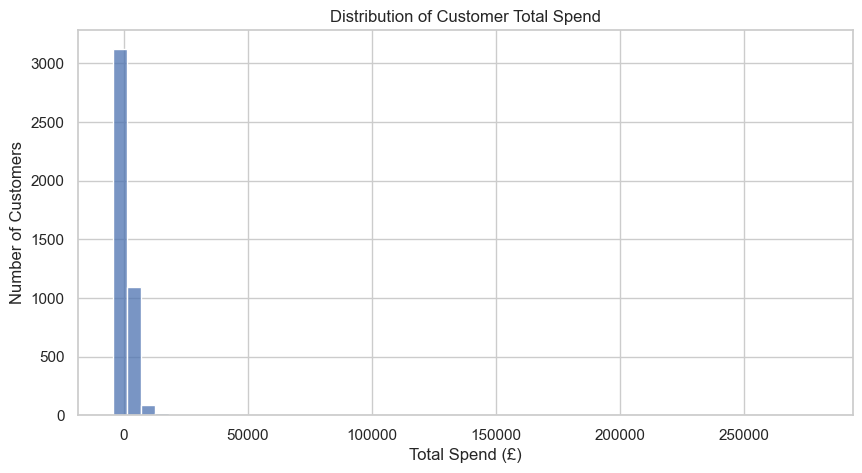

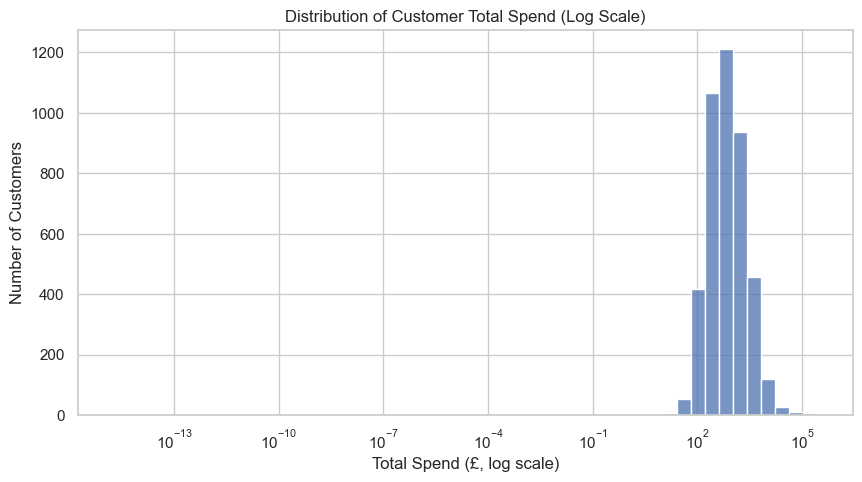

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic histogram of TotalSpend
plt.figure(figsize=(10, 5))
sns.histplot(customer_summary['TotalSpend'], bins=50, kde=False)
plt.title('Distribution of Customer Total Spend')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.show()

# Log-scale plot (exclude non-positive spend)
positive_spend = customer_summary[customer_summary['TotalSpend'] > 0]['TotalSpend']

plt.figure(figsize=(10, 5))
sns.histplot(positive_spend, bins=50, kde=False, log_scale=(True, False))
plt.title('Distribution of Customer Total Spend (Log Scale)')
plt.xlabel('Total Spend (£, log scale)')
plt.ylabel('Number of Customers')
plt.show()


## Step 2.3: Improving Spend Distribution Plots

The initial plots were dominated by extreme outliers, making it difficult to interpret the core customer spend patterns. We now:
- Limit the x-axis in the basic histogram to £5,000 to better focus on the main customer base.
- Set appropriate limits in the log-scaled plot to zoom in on real spenders and avoid tiny or irrelevant bins.


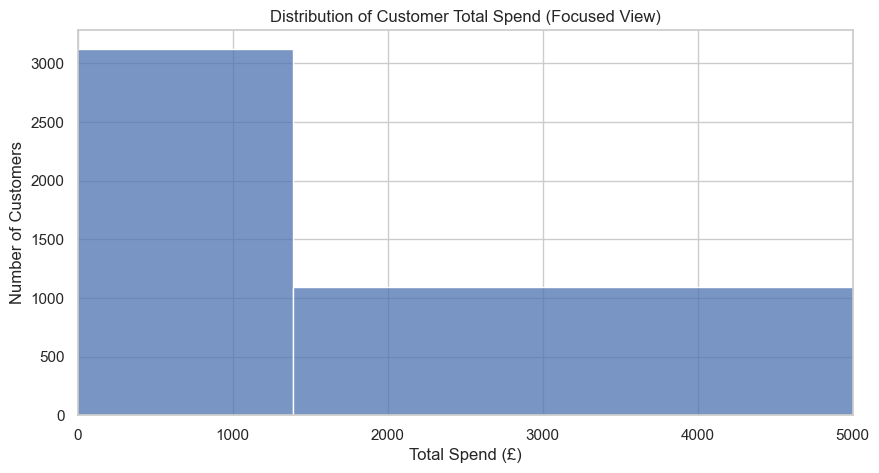

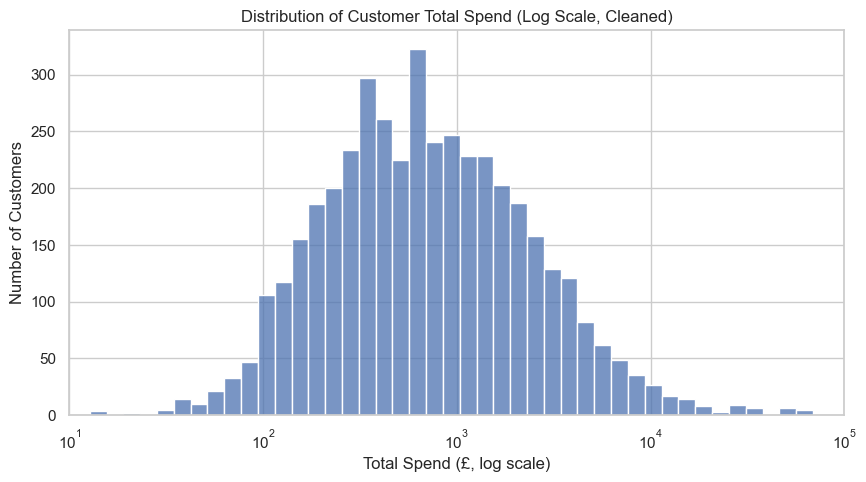

In [15]:
# Top plot with x-axis limit (0 to 5000)
plt.figure(figsize=(10, 5))
sns.histplot(customer_summary['TotalSpend'], bins=50, kde=False)
plt.title('Distribution of Customer Total Spend (Focused View)')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.xlim(0, 5000)
plt.show()

# Log-scale plot: filter for positive spend > £10 to avoid tiny values
positive_spend_filtered = positive_spend[positive_spend > 10]

plt.figure(figsize=(10, 5))
sns.histplot(positive_spend_filtered, bins=50, kde=False, log_scale=(True, False))
plt.title('Distribution of Customer Total Spend (Log Scale, Cleaned)')
plt.xlabel('Total Spend (£, log scale)')
plt.ylabel('Number of Customers')
plt.xlim(10, 100000)
plt.show()


### Insights from Spend Distribution Visualizations

- The focused plot (0–£5,000) reveals that the **majority of customers spend under £1,500–£2,000.**
- The log-scaled plot shows a **log-normal-like distribution,** peaking around £500–£1,000:
    - Many customers are clustered at lower spend levels (~£10–£100).
    - A long right tail confirms the presence of **high-spending customers,** some contributing tens of thousands of pounds.
- These insights confirm the dataset’s **strong skewness,** which is typical in retail where a minority of customers generate the majority of revenue.


## Step 2.4: Investigating Unusual Customer Patterns

We now explore and flag unusual customer profiles, including:
- Customers with zero total spend.
- Customers with negative total spend.
- Customers with zero or negative total quantity purchased.

This helps identify edge cases such as fully canceled orders, heavy returners, or possible data entry errors.


In [17]:
# Flag customers with zero total spend
customer_summary['IsZeroSpend'] = customer_summary['TotalSpend'] == 0

# Flag customers with negative total spend
customer_summary['IsNegativeSpend'] = customer_summary['TotalSpend'] < 0

# Flag customers with zero or negative total quantity
customer_summary['IsZeroOrNegativeQuantity'] = customer_summary['TotalQuantity'] <= 0

# Quick counts
zero_spend_count = customer_summary['IsZeroSpend'].sum()
negative_spend_count = customer_summary['IsNegativeSpend'].sum()
zero_or_neg_qty_count = customer_summary['IsZeroOrNegativeQuantity'].sum()

print(f"Customers with zero total spend: {zero_spend_count}")
print(f"Customers with negative total spend: {negative_spend_count}")
print(f"Customers with zero or negative total quantity: {zero_or_neg_qty_count}")

# Display a sample of flagged customers
display(customer_summary[
    customer_summary[['IsZeroSpend', 'IsNegativeSpend', 'IsZeroOrNegativeQuantity']].any(axis=1)
].head(10))


Customers with zero total spend: 7
Customers with negative total spend: 42
Customers with zero or negative total quantity: 53


,NumTransactions,TotalQuantity,TotalSpend,IsZeroSpend,IsNegativeSpend,IsZeroOrNegativeQuantity
CustomerID,,,,,,
12346.00,2,0,0.00,True,False,True
12454.00,2,0,0.00,False,False,True
12503.00,1,-1,-1126.00,False,True,True
12505.00,1,-1,-4.50,False,True,True
12558.00,2,0,0.00,False,False,True
12605.00,1,-4,-7.50,False,True,True
12607.00,2,0,0.00,False,False,True
12666.00,1,-56,-227.44,False,True,True
12870.00,1,-2,-14.90,False,True,True


### Insights from Unusual Customer Flagging

- 7 customers have zero total spend, likely indicating fully canceled or free orders.
- 42 customers have net-negative spend, suggesting significant refunds or returns.
- 53 customers have zero or negative total quantity, reflecting returns or special cases (e.g., fees).

We add a combined flag `IsProblemCustomer` to quickly identify and handle these edge cases in future analysis.


In [18]:
# Add combined problem flag
customer_summary['IsProblemCustomer'] = customer_summary[['IsZeroSpend', 'IsNegativeSpend', 'IsZeroOrNegativeQuantity']].any(axis=1)

# Quick count
problem_customers_count = customer_summary['IsProblemCustomer'].sum()
print(f"Total problem customers flagged: {problem_customers_count}")

# save a snapshot of flagged customers to CSV for later deep dives
customer_summary[customer_summary['IsProblemCustomer']].to_csv('problem_customers.csv')


Total problem customers flagged: 56


### Final Notes on Problem Customer Flagging

- We flagged 56 customers as potentially problematic based on:
    - Zero spend,
    - Negative spend,
    - Zero or negative total quantity.
- These rows have been saved separately for potential deeper analysis.
- This ensures that our main analysis and modeling can proceed cleanly with a well-defined, high-quality customer set.

## Step 2.5: Profiling the Top 10 Customers

We now examine the top 10 customers by total spend to understand their contribution to overall sales. This helps assess whether a small number of customers dominate revenue, a common pattern in retail.


Top 10 customers contribute £1,369,181.79, which is 16.50% of total sales.


,NumTransactions,TotalQuantity,TotalSpend,IsZeroSpend,IsNegativeSpend,IsZeroOrNegativeQuantity,IsProblemCustomer
CustomerID,,,,,,,
14646.00,76,196143,279489.02,False,False,False,False
18102.00,62,64122,256438.49,False,False,False,False
17450.00,55,69029,187482.17,False,False,False,False
14911.00,248,76930,132572.62,False,False,False,False
12415.00,26,76946,123725.45,False,False,False,False
14156.00,66,57025,113384.14,False,False,False,False
17511.00,46,63012,88125.38,False,False,False,False
16684.00,31,49390,65892.08,False,False,False,False
13694.00,60,61803,62653.10,False,False,False,False


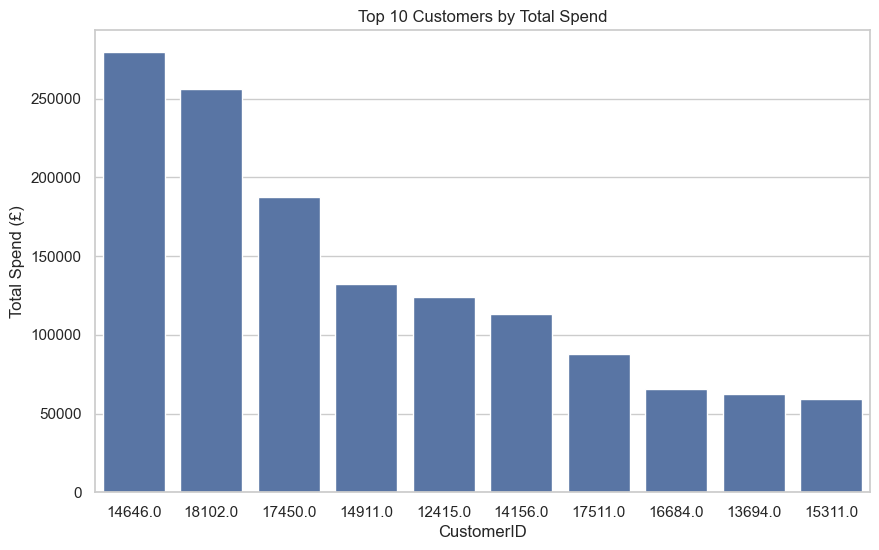

In [19]:
# Top 10 customers by TotalSpend
top_10_customers = customer_summary.sort_values(by='TotalSpend', ascending=False).head(10)

# Total sales from top 10
total_sales = customer_summary['TotalSpend'].sum()
top_10_sales = top_10_customers['TotalSpend'].sum()
percentage_of_total = (top_10_sales / total_sales) * 100

print(f"Top 10 customers contribute £{top_10_sales:,.2f}, which is {percentage_of_total:.2f}% of total sales.")

# Display top 10
display(top_10_customers)

# Bar chart of top 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_customers.index.astype(str),
    y=top_10_customers['TotalSpend']
)
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend (£)')
plt.show()


### Insights from Top 10 Customers

- The top 10 customers contribute £1,369,181.79 (~16.5% of total sales), highlighting a **moderate concentration of revenue.**
- The top two customers alone contribute over £500,000, showing significant individual impact.
- All top 10 customers have clean data with no flags, confirming they are genuine high-value customers.
- Some customers, such as CustomerID 14646.00, exhibit **massive quantities purchased** (196,143 items), suggesting either bulk purchasing or organizational buying behavior.
